In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../efcamdat_full.csv")

In [6]:
df

,id,level,unit,learner_id,learner_nationality,grade,date,topic_id,text,cefr_numeric,cefr_grouped
0,1,6,1,103510,no,90,2011-03-20 12:44:16.790,41,"After some time, the affection between them is...",2,1
1,2,6,2,103510,no,90,2011-03-26 09:31:35.133,42,An e-ticket is a provement that you bought the...,2,1
2,3,6,3,103510,no,86,2011-04-03 04:16:16.137,43,From:xxx@1234.com To:Herman xxx@1234.com Date:...,2,1
3,4,1,1,115938,cn,87,2011-03-23 23:53:12.710,1,"Hi Anna ,How are you . My name's Jayla . My te...",1,1
4,5,1,2,115938,cn,95,2011-03-25 03:13:50.393,2,"Dear Ms Thomas, There are thirty pens and fift...",1,1
...,...,...,...,...,...,...,...,...,...,...,...
1180304,1211598,1,1,107611,mx,90,2014-02-27 01:05:37.627,1,Good evenin SP evening . How are you? I'm fine...,1,1
1180305,1211599,1,1,55640,br,100,2014-02-26 19:56:50.247,1,"Good evening. How are you? I''m fine, thanks. ...",1,1
1180306,1211600,1,2,55640,br,95,2014-02-27 13:00:09.560,2,"In my oficce SP office , there are a lot of pe...",1,1
1180307,1211601,1,3,55640,br,80,2014-02-27 14:10:51.337,3,"I''m WC I lives AG live in Uberlandia, but i''...",1,1


In [5]:
# n unique learner Id's
len(df['learner_id'].unique())

174743

In [7]:
# n unique country ids
len(df['learner_nationality'].unique())

198

In [8]:
# n topics
len(df['topic_id'].unique())

128

In [10]:
from transformers import RobertaTokenizer, TFRobertaModel
rtokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [15]:
tokens = rtokenizer(df['text'].tolist(), truncation=True, padding=True, max_length=500, return_tensors='tf')

In [20]:
tok_lens = np.sum(np.array(tokens['input_ids']) != 1, axis=1)

In [21]:
def tok_stats(token_lengths):
    avg_length = np.mean(token_lengths)
    median_length = np.median(token_lengths)
    max_length = np.max(token_lengths)
    min_length = np.min(token_lengths)
    
    # Return the results as a dictionary
    return {
        "average_length": avg_length,
        "median_length": median_length,
        "max_length": max_length,
        "min_length": min_length,
        "total_texts": len(token_lengths)
    }

tok_stats(tok_lens)

{'average_length': 88.95201934408702,
 'median_length': 78.0,
 'max_length': 500,
 'min_length': 3,
 'total_texts': 1180309}

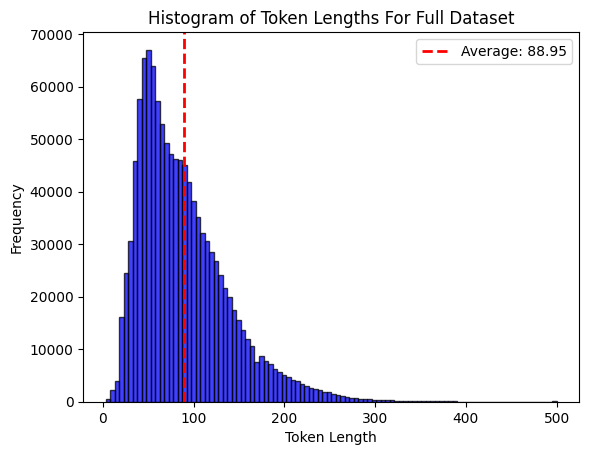

In [34]:
plt.hist(tok_lens, bins=100, alpha=0.75, color='blue', edgecolor='black')

# Draw the average line
plt.axvline(np.mean(tok_lens), color='red', linestyle='dashed', linewidth=2, label=f'Average: {np.mean(tok_lens):.2f}')

# Add labels and title
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Histogram of Token Lengths For Full Dataset')

# Add legend
plt.legend()

plt.savefig('efcamdat_full_hist.png')

In [73]:
df1 = pd.read_csv("../efcamdat_sub.csv")

In [31]:
#n unique learners
len(df1['learner_id'].unique())

110053

In [32]:
#n unique countries
len(df1['learner_nationality'].unique())

186

In [33]:
#n unique topics
len(df1['topic_id'].unique())

128

In [38]:
tokens = rtokenizer(df1['text'].tolist(), truncation=True, padding=True, max_length=500, return_tensors='tf')

In [39]:
tok_lens = np.sum(np.array(tokens['input_ids']) != 1, axis=1)

def tok_stats(token_lengths):
    avg_length = np.mean(token_lengths)
    median_length = np.median(token_lengths)
    max_length = np.max(token_lengths)
    min_length = np.min(token_lengths)
    
    # Return the results as a dictionary
    return {
        "average_length": avg_length,
        "median_length": median_length,
        "max_length": max_length,
        "min_length": min_length,
        "total_texts": len(token_lengths)
    }

tok_stats(tok_lens)

{'average_length': 115.34626038781164,
 'median_length': 107.0,
 'max_length': 500,
 'min_length': 3,
 'total_texts': 377967}

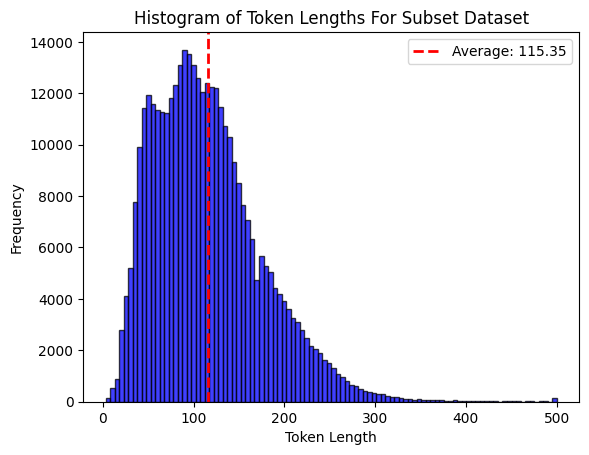

In [40]:
plt.hist(tok_lens, bins=100, alpha=0.75, color='blue', edgecolor='black')

# Draw the average line
plt.axvline(np.mean(tok_lens), color='red', linestyle='dashed', linewidth=2, label=f'Average: {np.mean(tok_lens):.2f}')

# Add labels and title
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Histogram of Token Lengths For Subset Dataset')

# Add legend
plt.legend()

plt.savefig('efcamdat_sub_hist.png')

In [53]:
df[df['topic_id'] == 100]['cefr_numeric'].value_counts()

5    1166
Name: cefr_numeric, dtype: int64

In [74]:
df1['labels'] = df1['cefr_numeric'].apply(lambda x: x-1)

In [75]:
def clip_words(text, num_words=5):
    text = str(text)
    words = text.split()
    if len(words) > 2 * num_words:
        return ' '.join(words[num_words:-num_words])
    else:
        # If the text has fewer than 2 * num_words, return an empty string or handle accordingly
        return text

In [76]:
df1['text_clipped'] = df1['text'].apply(clip_words)

In [80]:
import random
from tqdm import tqdm
import nltk
from nltk.corpus import wordnet

# Download the WordNet corpus
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielskahill/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielskahill/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [81]:
from nltk.tokenize import sent_tokenize

def synonym_replacement(text):
    words = text.split()
    new_words = []
    
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_words.append(synonym if synonym != word else word)
        else:
            new_words.append(word)
    
    return ' '.join(new_words)

def random_insertion(text):
    words = text.split()
    new_words = words.copy()
    synonyms = [wordnet.synsets(word)[0].lemmas()[0].name() for word in words if wordnet.synsets(word)]
    
    num_insertions = random.randint(1, 3)
    for _ in range(num_insertions):
        insert_word = random.choice(synonyms) if synonyms else random.choice(words)
        position = random.randint(0, len(new_words))
        new_words.insert(position, insert_word)
    
    return ' '.join(new_words)

def random_deletion(text, p=0.2):
    words = text.split()
    new_words = [word for word in words if random.random() > p]
    return ' '.join(new_words) if new_words else words[0]

def sentence_shuffling(text):
    sentences = sent_tokenize(text)
    if len(sentences) < 2:
        return text
    random.shuffle(sentences)
    return ' '.join(sentences)

def augment(text):
    if random.random() > .3:
        return text
    else:
        if random.random() < .2:
            text = synonym_replacement(text)
        if random.random() < .2: 
            text = random_insertion(text)
        if random.random() < .2:
            text = random_deletion(text, p=0.2)
        if random.random() < .2: 
            text = sentence_shuffling(text)
        return text 


In [82]:
tqdm.pandas()
df1['text_clipped'] = df1['text_clipped'].progress_apply(lambda x: augment(x))


100%|███████████████████████████████████| 377967/377967 [01:00<00:00, 6295.99it/s]


In [83]:
df1['text_clipped']

0         xxx@IXW.corporation To whom it may concern. Im...
1         receive this you. Also I wish interesting cour...
2         give up of my idea. I understood the steps, br...
3         have been brought to my attention relating to ...
4         interest in our products. To 1000 pens and 100...
                                ...                        
377962    always is a difficult time. We are always bett...
377963    a presentation about sales AS force's moral. E...
377964    think that my first step was kicking a soccer ...
377965    AG takes sometime, but now, I realize what a g...
377966    meteting SP meeting to discuss some subjects a...
Name: text_clipped, Length: 377967, dtype: object

In [91]:
df.groupby('cefr_numeric')['topic_id'].nunique()

cefr_numeric
1    24
2    24
3    24
4    24
5    24
6     8
Name: topic_id, dtype: int64